## TSP (Traveling Salesman Problem)

Jeder Ort soll einmal besucht werden. Die gesamte Reisestrecke 
 soll möglichst kurz sein und am Ende soll der Handlungsreisenden wieder am Ausgangsort ankommen.
 
TSP ist NP-vollständig, d.h. es wird vermutlich keinen polynomiellen Lösungsalgorithmus geben.

Es gibt viele Näherungsverfahren. In dem __[Video](https://www.youtube.com/watch?v=SC5CX8drAtU)__ werden 3 Verfahren präsentiert:

- Greedy
- 2-Opt
- Simulated Annealing

Testdaten für eigene Versuche gibt es z.B. __[hier](http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/)__

#### Vereinbarung

Eine **Tour** ist eine Liste mit Koordinaten (Positionen) <br>
Eine **Route** ist eine Liste mit Indizes <br>
Weder bei Touren noch bei Routen wird der Ausgangspunkt als letztes wieder drangehängt.
Das wird bei der Berechnung der Distanz berücksichtigt. <br>

Globale Variablen:
Die unveränderte Liste der Koordinaten bezeichnen wir mit **tour** <br>
Die (symmetrische) Distanzmatrix bezeichnen wir mit **D**


In [123]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Beispiel 1: Berlin52

Die [optimale Lösung](https://www.researchgate.net/figure/The-optimal-solution-of-Berlin52_fig2_221901574) für berlin52 ist 7544.3659

In [124]:
berlin52 = [(565, 575), (25, 185), (345, 750), (945, 685), (845, 655), (880, 660), (25, 230), 
            (525, 1000), (580, 1175), (650, 1130), (1605, 620), (1220, 580), (1465, 200), (1530, 5),
            (845, 680), (725, 370), (145, 665), (415, 635), (510, 875), (560, 365), (300, 465), 
            (520, 585), (480, 415), (835, 625), (975, 580), (1215, 245), (1320, 315), (1250, 400),
            (660, 180), (410, 250), (420, 555), (575, 665), (1150, 1160), (700, 580), (685, 595),
            (685, 610), (770, 610), (795, 645), (720, 635), (760, 650), (475, 960), (95, 260),
            (875, 920), (700, 500), (555, 815), (830, 485), (1170, 65), (830, 610), (605, 625), 
            (595, 360), (1340, 725), (1740, 245)]

In [125]:
def getData(tour):
    N = len(tour)
    D = np.zeros((N,N))
    for x in range(N):
        for y in range(x+1,N):
            D[x,y]=math.dist(tour[x],tour[y])
            D[y,x]=D[x,y]
    return D, list(range(N))

def distance(route):
    return D[np.roll(route, 1), route].sum()
    
    
def show(route,tour):
    print(f'Distance = {distance(route)}, Länge={len(route)}')
    xs = [tour[i][0] for i in route]
    ys = [tour[i][1] for i in route]
    xs.append(xs[0])
    ys.append(ys[0])
    plt.figure(figsize=(8,5))
    plt.scatter(xs, ys,s=10)        # these are the cities (points)
    plt.scatter(xs[0],ys[0],s=20)
    plt.plot(xs, ys, linewidth=0.2)  # the edges
    plt.axis('equal')
    plt.show()    
    
def randomTour(k,seed=None):
    '''
    k: Anzahl Städte
    returns: tour durch k Städte
    '''
    if seed: random.seed(seed)
    xs = [random.randint(1,400) for _ in range(k)]
    ys = [random.randint(1,400) for _ in range(k)]
    return list(zip(xs,ys))

#### Greedy


Vom Startpunkt aus wird immer die am nächsten gelegene Stadt besucht, die noch nicht besucht wurde. 


In [126]:
def nearest(i,a):
    '''
    i: Index eines Punkte
    a: Liste Indizes
    returns: Index des Punktes aus der Indexliste a, der zu i den kleinsten Abstand hat.
    '''
    best = None
    best_val = float('inf')
     
    for j in a:
        if D[i,j] < best_val:
            best = j         
            best_val = D[i,j]
    return best

def greedy(route,start=0):
    a = route.copy()
    result = [start]
    i = start
    a.remove(i)

    while a:
        j = nearest(i,a)
        result.append(j)
        a.remove(j)
        i = j
    return result

Distance = 22205.617692710774, Länge=52


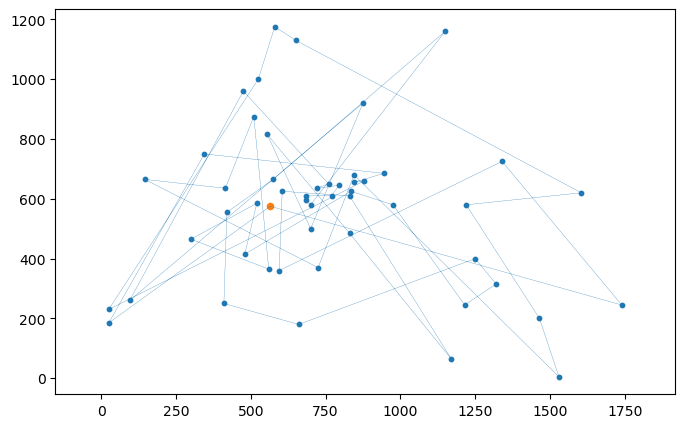

Distance = 8980.91827932919, Länge=52


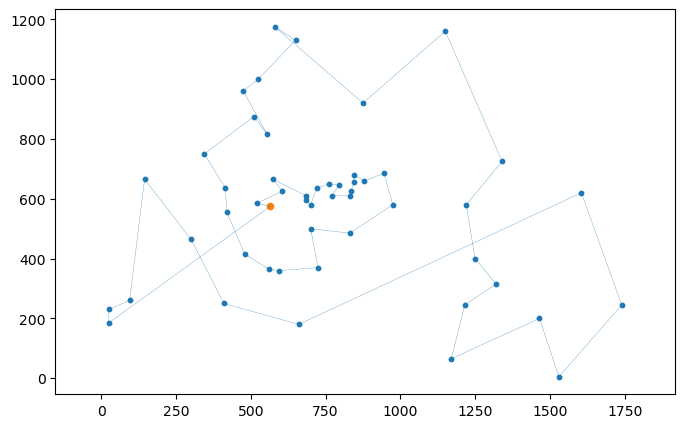

In [127]:
tour = berlin52
D, route = getData(tour)
show(route,tour)
route = greedy(route)
show(route,tour)

#### Greedy mit Two-Opt

<img src='bild1.png' width='600'>

In [128]:
def costChange(r, i, j):
    return D[r[i],r[j]] + D[r[i+1],r[j+1]] - D[r[i],r[i+1]] - D[r[j],r[j+1]]

def twoOpt(route):
    global zaehl
    best = route.copy()
    best.append(route[0])
    N = len(best)
    improved = True
    while improved:
        improved = False
        for i in range(0, N-1):   
            for j in range(i + 2, N-1):
                if costChange(best, i, j) < 0:
                    zaehl+=1
                    best[i+1:j+1] = best[j:i:-1]
                    improved = True
        route = best
    return best[:-1]

In [ ]:
def 

In [129]:
def twoOpt(route):
    r = route.copy()
    r.append(route[0])
    N = len(r)
    improved = True
    while improved:
        improved = False
        for i in range(0, N-1):   
            for j in range(i + 2, N-1):
                if D[r[i],r[j]] + D[r[i+1],r[j+1]] - D[r[i],r[i+1]] - D[r[j],r[j+1]] < 0:
                    r[i+1:j+1] = r[j:i:-1]
                    improved = True
    return r[:-1]

Distance = 8980.91827932919, Länge=52


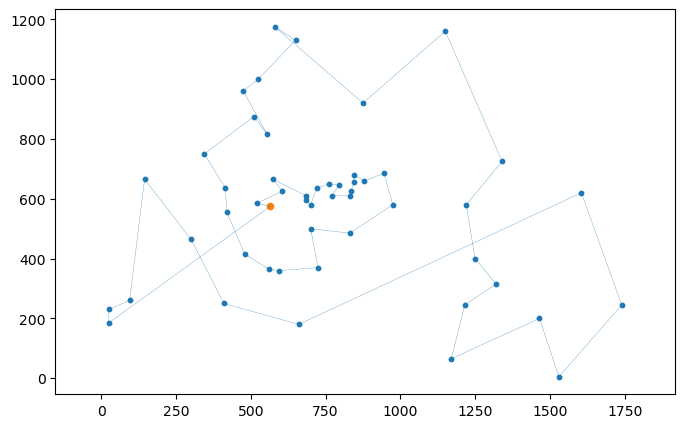

Distance = 8060.651582560567, Länge=52


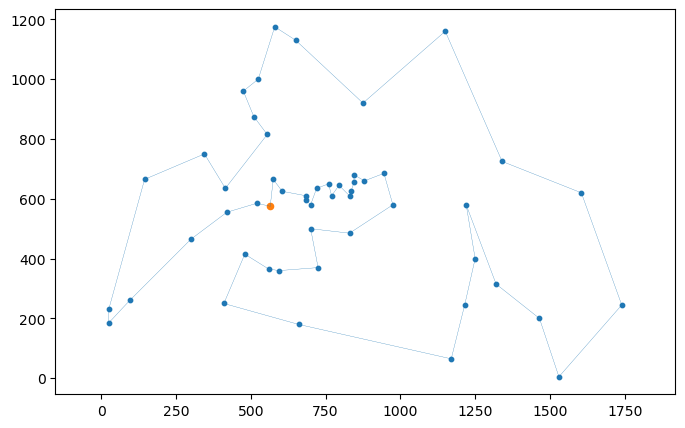

CPU times: total: 359 ms
Wall time: 347 ms


In [130]:
%%time
tour = berlin52
D, route = getData(tour)
route = greedy(route,start=0)
show(route,tour)
route = twoOpt(route)
show(route,tour)
 

### Beispiel 2: Codingame Example 5 - 300 Cities

300 Städte - Optimales Ergebnis laut Forum: 17112

https://www.codingame.com/ide/puzzle/travelling-salesman 

In [131]:
# 300 Städte
codingame5=[(1585, 817), (1578, 521), (331, 606), (680, 581), (1199, 41), (319, 528), (1682, 957), (1508, 118), (1676, 950), (28, 569), (35, 253), (202, 825), (1144, 332), (1204, 470), (11, 471), (1784, 125), (1759, 930), (42, 643), (616, 753), (264, 20), (842, 852), (1705, 893), (1509, 872), (1105, 283), (106, 761), (542, 121), (1510, 501), (325, 939), (1340, 833), (47, 676), (12, 113), (1325, 805), (1549, 881), (995, 396), (1392, 290), (768, 533), (1572, 255), (537, 958), (795, 148), (4, 951), (1733, 249), (1318, 926), (30, 609), (955, 902), (880, 807), (746, 110), (853, 869), (1619, 738), (1584, 161), (1254, 739), (1163, 428), (258, 220), (1759, 617), (320, 635), (456, 37), (50, 608), (1585, 955), (1354, 297), (1299, 667), (1305, 181), (1250, 18), (1497, 987), (1616, 147), (389, 832), (11, 417), (194, 348), (572, 127), (367, 237), (1272, 828), (1181, 98), (803, 622), (800, 415), (1645, 672), (885, 722), (1311, 688), (1458, 599), (358, 422), (1576, 691), (7, 398), (999, 641), (27, 417), (760, 110), (979, 559), (689, 924), (364, 672), (1342, 453), (1055, 445), (1156, 901), (1451, 932), (957, 196), (602, 328), (256, 264), (1264, 19), (1482, 741), (728, 809), (326, 903), (342, 557), (195, 405), (829, 298), (1319, 353), (277, 741), (1112, 189), (1702, 137), (708, 439), (1045, 650), (416, 26), (467, 827), (62, 110), (388, 541), (556, 380), (876, 132), (1289, 552), (1750, 589), (1032, 993), (212, 933), (13, 410), (516, 324), (1172, 899), (813, 427), (833, 831), (63, 721), (370, 897), (1460, 532), (1474, 577), (1341, 868), (1703, 171), (1135, 679), (1112, 221), (1182, 294), (1068, 577), (1762, 954), (125, 741), (301, 98), (1334, 11), (1409, 28), (1524, 763), (1588, 172), (1148, 470), (154, 623), (499, 479), (1453, 442), (416, 294), (508, 428), (920, 918), (95, 363), (244, 956), (530, 935), (238, 598), (1532, 936), (1587, 553), (261, 671), (547, 810), (963, 608), (1742, 359), (1675, 223), (46, 796), (1662, 996), (1036, 443), (758, 864), (1543, 23), (1741, 65), (1483, 949), (369, 300), (527, 162), (163, 160), (51, 850), (900, 70), (1123, 588), (351, 274), (625, 860), (410, 524), (1730, 15), (892, 779), (1681, 356), (1026, 481), (460, 352), (557, 26), (864, 930), (518, 688), (1461, 221), (1662, 24), (1071, 211), (1561, 143), (1721, 248), (224, 100), (830, 483), (1243, 687), (1503, 673), (273, 116), (61, 29), (395, 840), (1635, 401), (1092, 500), (1128, 249), (1628, 362), (1249, 991), (949, 181), (1313, 689), (710, 850), (970, 89), (1736, 669), (854, 845), (1381, 696), (972, 168), (1355, 561), (1404, 583), (471, 187), (185, 893), (1504, 274), (709, 988), (750, 508), (387, 527), (1023, 398), (1393, 650), (1561, 664), (1694, 714), (479, 888), (128, 201), (1529, 762), (295, 326), (123, 675), (1712, 155), (295, 140), (719, 104), (579, 467), (106, 520), (204, 257), (66, 665), (895, 174), (1077, 431), (938, 444), (977, 156), (480, 224), (1149, 881), (1201, 185), (1303, 181), (1055, 890), (306, 280), (1361, 564), (1756, 57), (1589, 518), (376, 414), (181, 445), (86, 35), (966, 169), (147, 488), (255, 1), (582, 630), (350, 402), (810, 331), (1524, 802), (1743, 987), (468, 887), (980, 973), (744, 461), (1036, 584), (1369, 239), (698, 202), (344, 259), (15, 520), (780, 857), (585, 107), (277, 258), (1460, 906), (1451, 181), (721, 11), (1364, 293), (806, 44), (391, 363), (1446, 603), (773, 805), (1649, 409), (876, 958), (1321, 544), (1434, 544), (949, 214), (287, 467), (1302, 736), (952, 179), (892, 949), (350, 839), (1574, 533), (303, 161), (1550, 967), (1604, 53), (554, 694), (1158, 631), (880, 258), (845, 805), (33, 826), (308, 359), (1760, 659), (457, 62), (802, 236), (1499, 80), (657, 331), (1707, 843), (843, 587), (1558, 270), (280, 960)]


Distance = 223168.27703251963, Länge=300


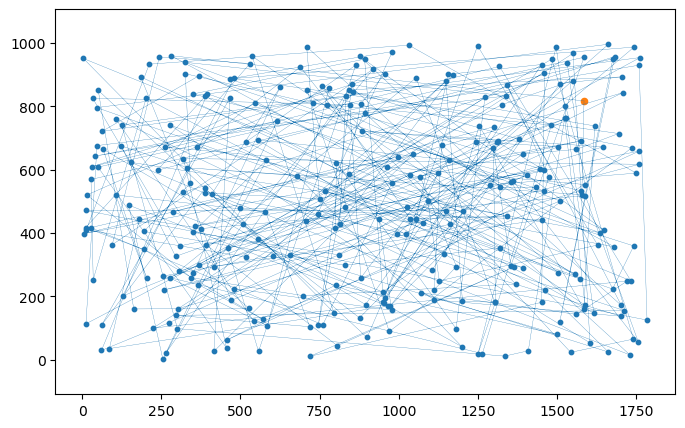

Distance = 22897.11097217723, Länge=300


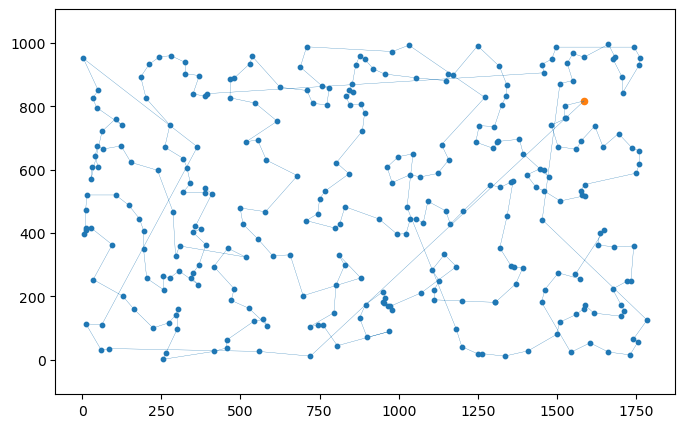

Distance = 18678.42855509499, Länge=300


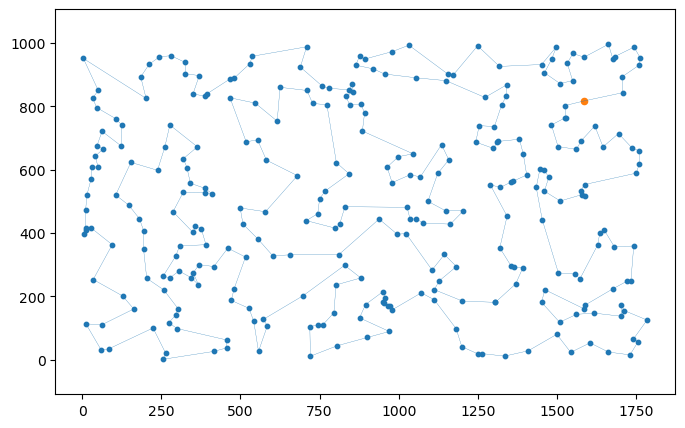

CPU times: total: 859 ms
Wall time: 859 ms


In [133]:
%%time
tour = codingame5
D, route = getData(tour)
show(route,tour)
route = greedy(route,start=0)
show(route,tour)
route = twoOpt(route)
show(route,tour)
 

#### Simulated Annealing

In [217]:
def reverse(route):
    r = route.copy()
    i = j = 0
    while abs(i-j) <= 1:
        i,j = sorted(random.sample(route,2))
    r[i+1:j+1] = r[j:i:-1]
    return r

def transport(route):
    r = route.copy()
    n = len(r)
    i = random.randint(1,n-2)
    j = random.randint(i+1,n-1)
    k = random.randint(i+1,j)
    r[i:j+1] = r[k:j+1] + r[i:k]
    return r
    



def anneal(route,H=125,alpha=0.995):
    '''
    H: bei gleicher Temperatur wird H-mal iteriert
    alpha: cooling-rate
    '''
    best_dist = distance(route)
    best_route = route.copy()
    T = 100
    T_min = 0.0005
    while T > T_min:
        for i in range(H):   
            if random.random() < 0.5:
                new_route = reverse(best_route)  # zufälliger swap
            else:
                new_route = transport(best_route)  # zufälliger swap
            new_dist = distance(new_route)
            if (new_dist < best_dist):
                best_route = new_route.copy()
                best_dist = new_dist
            else:
                loss = new_dist - best_dist
                if random.random() <=  math.exp(-loss/T):
                    best_route = new_route.copy()
                    best_dist = new_dist
 
        T = T*alpha
    return best_route 

Distance = 22205.617692710774, Länge=52


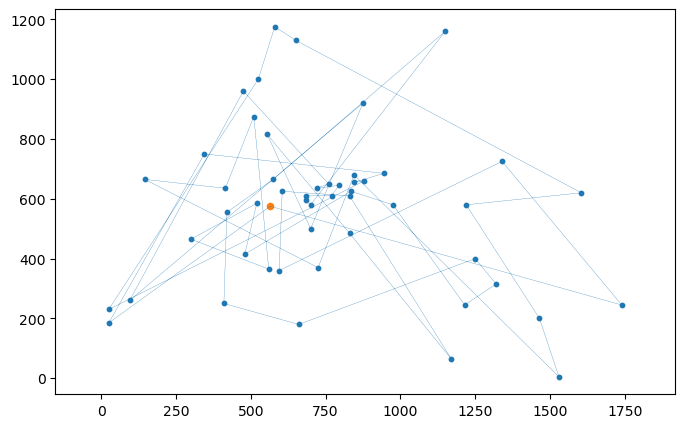

Distance = 7544.36590190409, Länge=52


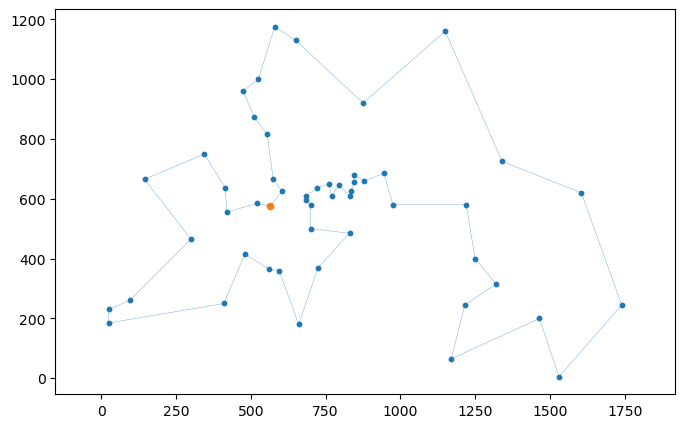

CPU times: total: 10.9 s
Wall time: 10.9 s


In [218]:
%%time
tour = berlin52
D, route = getData(tour)
show(route,tour)
route = anneal(route)
show(route,tour)

Distance = 17724.41698246078, Länge=300


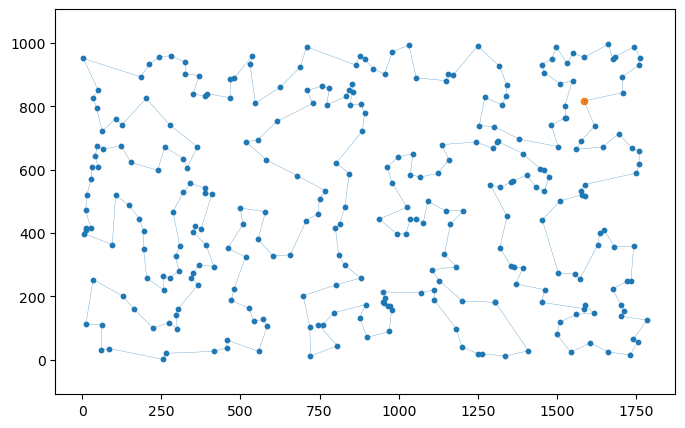

CPU times: total: 3min 26s
Wall time: 3min 26s


In [223]:
%%time
tour = codingame5
D, route = getData(tour)
route = greedy(route)
route = anneal(route,alpha=0.9995,H=100)
show(route,tour)

#### Erläuterung des Kriteriums 

    random.random() <=  math.exp(-loss/T)
    
`random.random()` liefert eine zufällige Zahl zwischen 0 und 1. Je größer die Temperatur T ist, desto wahrscheinlicher liegt
diese Zahl unterhalb der Kurve. Bei kleinerem loss wahrscheinlicher als bei großem loss.

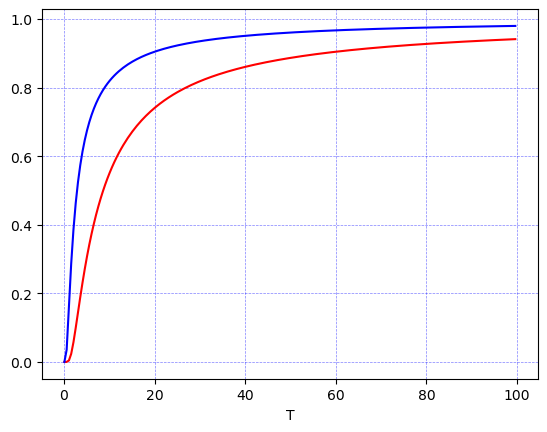

In [179]:

T = np.arange(0.1, 100, 0.5)

plt.plot(T, math.e**(-6/T), 'red')      # loss 6
plt.plot(T, math.e**(-2/T), 'blue')     # loss 2
plt.xlabel("T")
plt.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.show()

If reverse comes up, an alternative path is generated in which the cities in the chosen segment are reversed in order of visit. If transport, the segment is clipped out of its current position in the path and spliced in at a randomly chosen point in the remainder of the path. The length of the modified path is then calculated and compared to the path before modification, producing a quantity called the cost difference. If negative, the modified path is shorter than the original path and always replaces it. If there is an increase in cost, however, the exponential of its negative magnitude divided by the current temperature is compared to a uniformly distributed random number between 0 and 1 and, if greater, the modified path will be used even though it increased the cost. Note that initially, when the temperature is high, there will be a greater probability of making such changes, but that as the temperature falls, only smaller increases in cost will be accepted. The total number of changes tested at each temperature level is arbitrarily set to 100 times the number of cities in the path, and after ten times the number of changes which decrease the path length as the number of cities are found, the temperature is decreased and the search continued. If, after trying all of the potential changes at a given temperature level, no changes are found which reduce the path length, the solution is considered “good enough” and the resulting path is displayed.

In [205]:
r = list(range(10))
r

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [206]:
i, j, k = 1,7,3
r[i:j+1] = r[k:j+1] + r[i:k]

In [207]:
r

[0, 3, 4, 5, 6, 7, 1, 2, 8, 9]